<a href="https://colab.research.google.com/github/aditya2k5/women_corelation_dataset/blob/main/wemon_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

df = pd.read_csv('WomenCorrelation.csv')

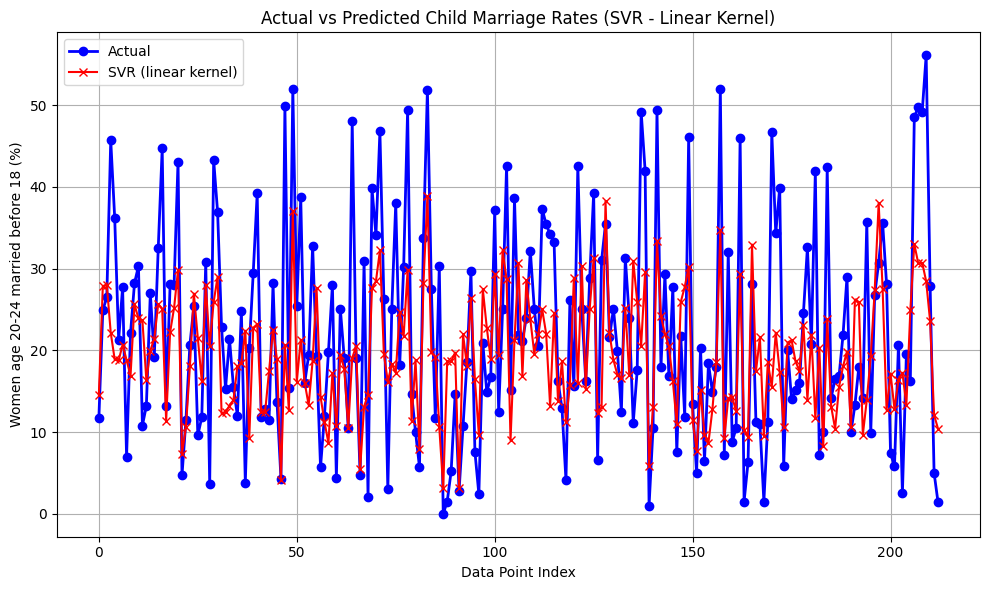

Mean Absolute Error (MAE): 8.56
Mean Squared Error (MSE): 118.87
Root Mean Squared Error (RMSE): 10.90
R² Score: 0.33


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


def clean_numeric(value):
    try:
        # Remove parentheses and other unwanted characters
        cleaned = str(value).replace('(', '').replace(')', '').strip()
        return float(cleaned)
    except (ValueError, AttributeError):
        # Return NaN for invalid values
        return np.nan

# Drop rows with missing values and clean the data
df_cleaned = df.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply cleaning to the relevant columns
df_cleaned["Women (age 15-49) who are literate4 (%)"] = df_cleaned[
    "Women (age 15-49) who are literate4 (%)"
].apply(clean_numeric)
df_cleaned["Women age 20-24 years married before age 18 years (%)"] = df_cleaned[
    "Women age 20-24 years married before age 18 years (%)"
].apply(clean_numeric)

# Drop rows with NaN after cleaning
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Women (age 15-49) who are literate4 (%)"]]
y = df_cleaned["Women age 20-24 years married before age 18 years (%)"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features and target
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize and train SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale the results
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

# Plot Actual vs Predicted (SVR only)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o', color='blue', linewidth=2)
plt.plot(range(len(y_pred_svr)), y_pred_svr, label='SVR (linear kernel)', color='red', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Women age 20-24 married before 18 (%)')
plt.title('Actual vs Predicted Child Marriage Rates (SVR - Linear Kernel)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")